# DESAFIO MODELO PROPERATTI

In [1]:
import Util as utl
import pandas as pd
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### SE PONEN NULLABLE LOS OUTLIERS Y SON IMPUTADOS   .......... z-score  [0.75]

In [2]:
#data = pd.read_csv('/home/DS-DH/jupyter/digitalHouse/properatti.csv')
#data = utl.limpiarDatos(data,0.75)
data = pd.read_csv('/home/DS-DH/jupyter/digitalHouse/data.csv',sep='|')
#data.to_csv('/home/DS-DH/jupyter/digitalHouse/data.csv',sep='|')


In [3]:
matriz = utl.GenerarMatriz(data)

#### SE GENERAN LAS DUMMYS PARA EL MODELO

In [4]:
modeloMatriz = utl.generarDummies(matriz)
#modeloMatriz=modeloMatriz[(modeloMatriz.superficie_total>20) & (modeloMatriz.superficie_total<150)]
#modeloMatriz=modeloMatriz[(modeloMatriz.precio_m2>20) & (modeloMatriz.precio_m2<8000)]
#modeloMatriz.describe()

In [5]:
modeloMatriz.describe()
modeloMatriz.shape
#modeloMatriz.precio_m2 = pd.qcut(modeloMatriz.precio_m2,25).apply(lambda x: x.mid.round(-2).astype(int))

(9577, 77)

In [10]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
xs = modeloMatriz.iloc[:,1:]
y = modeloMatriz.iloc[:,0]


In [11]:
estimator = SVR(kernel="linear")

In [12]:
selector = RFECV(estimator, step=1, cv=5)

In [ ]:
selector = selector.fit(xs, y)

### Regresion Lineal Multiple

/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


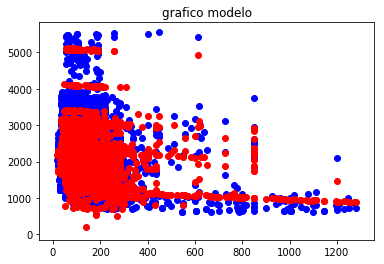

CROSS VALIDATION: 0.8153636622504373 0.8329406978344485 0.8571407155597679 0.8296679738889998 0.8372344790443041
MAE: 230.84778467989443
MSE: 82645.62340834651
RMSE: 287.481518377002
EL R2 TRAIN ES DE:  0.8446832621690762
EL R2 TEST ES DE:  0.8412325827698014


In [6]:
modelo = utl.modelo_regresion_lineal(modeloMatriz)

In [67]:
modeloMatriz_2 = modeloMatriz[['precio_m2','superficie_total',                            
'CASA',
'PH',
'DTO',
'mataderos',
'belgrano',
'palermo',
'flores',
'boedo',
'balvanera',
'caballito',
'nunez',
'almagro',
'capital_federal',
'barracas',
'las_canitas',
'recoleta',
'puerto_madero',
'villa_crespo',                               
'barrio_norte',
'saavedra',
'coghlan',
'san_telmo',
'monserrat',
'floresta',
'boca',
'san_cristobal',
'retiro',
'parque_chas',
'villa_urquiza',
'villa_devoto',
'colegiales',
'parque_avellaneda',
'liniers',
'tribunales',
'constitucion',
'congreso',
'once',
'palermo_viejo',
'parque_patricios',
'velez_sarsfield',
'villa_luro',
'palermo_chico',
'parque_centenario',
'villa_ortuzar',
'parque_chacabuco',
'villa_lugano',
'villa_soldati',
'chacarita',
'villa_riachuelo',
'pompeya']]

In [6]:
utl.summary(modeloMatriz)

EMC: 80807.04654940696
                            OLS Regression Results                            
Dep. Variable:              precio_m2   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     361.6
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        02:39:21   Log-Likelihood:                -33923.
No. Observations:                4788   AIC:                         6.799e+04
Df Residuals:                    4717   BIC:                         6.845e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
superfici

NameError: name 'modelo' is not defined

In [12]:
matriz[['superficieJardines','superficieTerrazas','superficieJardinesTerrazas']].applymap(lambda x: 1 if x>0 else 0)	#GENERO VARIABLES INDEPENDIENTE

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
xs = modeloMatriz_2.iloc[:,1:]
y = modeloMatriz_2.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.6)
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)
print ("EMC:", mean_squared_error(y_test, predictions))
print(model.summary())

#### Regresion Ridge

/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:59: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:60: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


REGULARIZACION CON RIDGE
CROSS VALIDATION: 0.84307790146404 0.8283855319515387 0.8395720552228034 0.8273539691502757 0.8317468444275985
MAE RIDGE: 241.94510776071132
MSE RIDGE: 94043.7692642826
RMSE RIDGE: 306.66556582747046
RIDGE -> R2 TRAIN:  0.8391322541626478
RIDGE -> R2 TEST:  0.8250003577164868


(2161.586147418442,
 array([ 9.32008600e-02, -1.42853369e+01, -9.01936978e+00,  8.69791939e+00,
        -8.67974432e+00, -2.24421411e+01, -3.09566315e+01, -3.73379144e+01,
        -3.93318132e+01,  4.72171077e+00,  9.51547137e+01, -4.08241128e+02,
        -2.29849348e+02,  3.54330808e+02, -6.86725800e+02,  4.98232964e+02,
         1.76725818e+01,  5.94362505e+02, -4.71398254e+02, -7.52448999e+02,
        -5.89297012e+02, -6.31815362e+01,  3.93764188e+02, -3.11550333e+02,
        -5.34058684e+02, -4.79969569e+02,  8.29839241e+02,  5.82765918e+02,
         2.59951039e+03, -7.93323245e+00,  3.06660098e+02, -1.28345935e+01,
        -1.12272876e+02, -2.72674824e+02,  5.57339435e+01, -2.32004741e+02,
        -4.48679010e+02, -1.10435044e+02, -8.21152754e+02, -5.50506063e+02,
        -4.15955514e+02, -4.37345543e+02,  2.10925500e+02, -1.81433005e+02,
         3.75699248e+01, -3.28230634e+02, -1.57142927e+02, -3.37215922e+02,
         1.11942783e+02, -7.21706969e+02, -5.36630936e+02, -4.170073

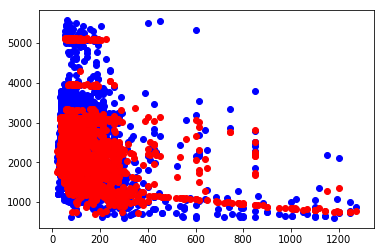

In [26]:
modelo_ridge = utl.modelo_ridge_cross_validation(modeloMatriz)
(modelo_ridge.intercept_,modelo_ridge.coef_)

#### Lasso Regression

/home/DS-DH/streamlit/digitalHouse/modelo-properatti/Util.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/streamlit/digitalHouse/modelo-properatti/Util.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


LASSO REGRESSION
CROSS VALIDATION: 0.8229439823715031 0.839345296882035 0.8411883244802392 0.8519973284253005 0.844909761834099
MAE LASSO: 230.1730800411223
MSE LASSO: 83098.42105389433
RMSE LASSO: 288.26796744330494
LASSO -> R2 TRAIN:  0.8436673834386264
LASSO -> R2 TEST:  0.8422866816618438


(1572.9796165802068,
 array([-2.81456483e-01, -1.40903015e+02, -0.00000000e+00,  5.98148235e+02,
        -3.24016418e+02,  8.70655374e+02,  9.58455843e+02, -1.03490849e+02,
        -3.59764942e+02, -2.52466811e+02,  2.52506235e+02,  8.00858318e+02,
         6.04621537e+01, -1.81930080e+02, -1.14886152e+02,  1.15421323e+03,
         9.61412362e+02,  2.94365731e+03,  3.46940918e+02,  6.83108557e+02,
         2.52975721e+02,  4.49050280e+02,  7.34657622e+01, -1.04124263e+02,
        -1.16697270e+02, -4.72878774e+02, -1.36286282e+02,  6.19099025e+02,
         1.22763955e+02,  3.95180168e+02,  1.79166788e+02,  4.24189101e+02,
        -3.81251610e+02, -1.52898768e+02, -1.04823474e+02, -4.56923386e+02,
        -1.57906983e+02, -3.41349554e+02, -1.36131698e+02, -3.04481850e+02,
        -3.06921118e+02, -6.91842530e+01,  1.05085516e+03,  1.52383076e+02,
         2.95729999e+02, -1.64381037e+02, -7.23447367e+02, -8.36442325e+02,
         2.04018650e+02, -2.85651274e+02, -6.63663209e+02]))

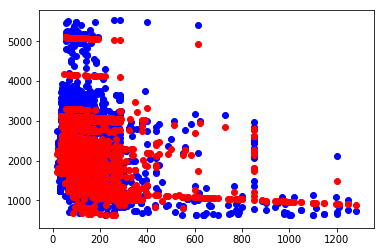

In [80]:
modelo_lasso = utl.modelo_lasso_cross_validation(modeloMatriz_2)
(modelo_lasso.intercept_,modelo_lasso.coef_)


In [91]:
modelo_lasso.coef_

array([-2.81456483e-01, -1.40903015e+02, -0.00000000e+00,  5.98148235e+02,
       -3.24016418e+02,  8.70655374e+02,  9.58455843e+02, -1.03490849e+02,
       -3.59764942e+02, -2.52466811e+02,  2.52506235e+02,  8.00858318e+02,
        6.04621537e+01, -1.81930080e+02, -1.14886152e+02,  1.15421323e+03,
        9.61412362e+02,  2.94365731e+03,  3.46940918e+02,  6.83108557e+02,
        2.52975721e+02,  4.49050280e+02,  7.34657622e+01, -1.04124263e+02,
       -1.16697270e+02, -4.72878774e+02, -1.36286282e+02,  6.19099025e+02,
        1.22763955e+02,  3.95180168e+02,  1.79166788e+02,  4.24189101e+02,
       -3.81251610e+02, -1.52898768e+02, -1.04823474e+02, -4.56923386e+02,
       -1.57906983e+02, -3.41349554e+02, -1.36131698e+02, -3.04481850e+02,
       -3.06921118e+02, -6.91842530e+01,  1.05085516e+03,  1.52383076e+02,
        2.95729999e+02, -1.64381037e+02, -7.23447367e+02, -8.36442325e+02,
        2.04018650e+02, -2.85651274e+02, -6.63663209e+02])

In [ ]:
import statsmodels.api as sm

X = df[["RM"]]
y = modeloMatriz.precio_m2

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

## PARAMETROS A PREDECIR
###### PARA LA PREDICCION DE PRECIOS POR M2 DE ALQUILERES EN CAPITAL FEDERAL
## NORMALIZAR O NO.. DEPENDE EL MODELO A USAR

In [60]:
SUPERFICIE_TOTAL = 30          ##  [0,600]
JARDIN = '0'                      ##  0,1
TERRAZA = '1'                     ##  0,1
CANTIDAD_DE_AMBIENTES = '1'       ##  1,2,3,4,4,5,6,7
TIPO_DE_PROPIEDAD = 'DTO'        ##  CASA, PH, DTO
BARRIO = 'villa urquiza'               ##  barrios de CABA, en minusculas

nuevos_Feactures = utl.nuevosDatos(modeloMatriz, SUPERFICIE_TOTAL, JARDIN, TERRAZA, CANTIDAD_DE_AMBIENTES, TIPO_DE_PROPIEDAD, BARRIO)
y_predict = modelo.predict(nuevos_Feactures)

'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE {} U$D POR M2'.format(y_predict[0].astype(int))


/home/DS-DH/notebooks/digitalHouse/modelo-properatti/Util.py:376: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  predecir_data.superficie_total_2 = predecir_data.superficie_total**2


'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE 2546 U$D POR M2'

## GUARDAMOS EN PKL

In [6]:
import os
import pickle
with open('modelo.pkl', 'wb') as pkl:
    pickle.dump((modelo,data,matriz,modeloMatriz), pkl)